# 1. What is the average distance traveled by trips with a maximum of 2 passengers;

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 2000)

Lendo o csv já preparado no sql para melhorar a performance

In [2]:
df = pd.read_csv('ate_dois_passageiros.csv',encoding='iso-8859-1',delimiter =';')

# inspecionando

df.head(10)


,dropoff_datetime,pickup_datetime,dropoff_datetime_original,pickup_datetime_original,dropoff_date,pickup_date,dropoff_time,pickup_time,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,payment_type,rate_code,store_and_fwd_flag,surcharge,tip_amount,total_amount,trip_distance,vendor_id,payment_lookup,vendor_name,vendor_address,vendor_city,vendor_state,Unnamed: 27,vendor_zip,vendor_country,vendor_contact,vendor_current
0,2009-01-04 00:14:53.000,2009-01-04 00:00:16.000,2009-01-04T00:14:53.983557+00:00,2009-01-04T00:00:16.442478+00:00,2009-01-04,2009-01-04,00:14:53.0000000,00:00:16.0000000,40.751178,-73.994145,40.761782,-73.985082,4.5,1,CASH,NaN,NaN,0.0,0.00,4.50,0.96,VTS,Cash,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes,NaN
1,2009-01-04 00:22:48.000,2009-01-04 00:11:35.000,2009-01-04T00:22:48.580928+00:00,2009-01-04T00:11:35.330769+00:00,2009-01-04,2009-01-04,00:22:48.0000000,00:11:35.0000000,40.798782,-73.979021,40.754507,-73.987906,13.8,1,Cash,NaN,NaN,0.0,0.00,13.80,4.90,CMT,Cash,"""Creative Mobile Technologies","LLC""",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com.Yes,NaN
2,2009-01-04 00:26:24.000,2009-01-04 00:14:29.000,2009-01-04T00:26:24.03359+00:00,2009-01-04T00:14:29.317353+00:00,2009-01-04,2009-01-04,00:26:24.0000000,00:14:29.0000000,40.736737,-74.008230,40.724120,-74.000112,6.5,1,CASH,NaN,NaN,0.0,0.00,6.50,1.28,VTS,Cash,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes,NaN
3,2009-01-04 00:33:32.000,2009-01-04 00:29:57.000,2009-01-04T00:33:32.570771+00:00,2009-01-04T00:29:57.647059+00:00,2009-01-04,2009-01-04,00:33:32.0000000,00:29:57.0000000,40.772233,-73.989840,40.779220,-73.950745,12.1,1,CASH,NaN,NaN,0.0,0.00,12.10,2.84,VTS,Cash,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes,NaN
4,2009-01-04 00:35:58.000,2009-01-04 00:31:50.000,2009-01-04T00:35:58.815661+00:00,2009-01-04T00:31:50.473645+00:00,2009-01-04,2009-01-04,00:35:58.0000000,00:31:50.0000000,40.750226,-73.991316,40.730044,-73.999026,6.1,1,Credit,NaN,NaN,0.0,0.91,7.01,1.60,CMT,Credit,"""Creative Mobile Technologies","LLC""",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com.Yes,NaN
5,2009-01-04 00:36:55.000,2009-01-04 00:27:21.000,2009-01-04T00:36:55.445071+00:00,2009-01-04T00:27:21.498238+00:00,2009-01-04,2009-01-04,00:36:55.0000000,00:27:21.0000000,40.750572,-73.978998,40.743170,-73.999968,6.9,1,CASH,NaN,NaN,0.0,0.00,6.90,1.80,VTS,Cash,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes,NaN
6,2009-01-04 00:39:36.000,2009-01-04 00:32:00.000,2009-01-04T00:39:36.955726+00:00,2009-01-04T00:32:00.897245+00:00,2009-01-04,2009-01-04,00:39:36.0000000,00:32:00.0000000,40.755855,-74.002205,40.752346,-73.993313,5.0,1,Cash,NaN,NaN,0.0,0.00,5.00,0.50,CMT,Cash,"""Creative Mobile Technologies","LLC""",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com.Yes,NaN
7,2009-01-04 00:41:37.000,2009-01-04 00:35:14.000,2009-01-04T00:41:37.693267+00:00,2009-01-04T00:35:14.349425+00:00,2009-01-04,2009-01-04,00:41:37.0000000,00:35:14.0000000,40.740907,-73.978744,40.726718,-73.983316,5.7,1,CASH,NaN,NaN,0.0,0.00,5.70,1.10,DDS,Cash,"""Dependable Driver Service","Inc""",8554 North Homestead St.,Bronx,NY,10472,USA,9778896500.Yes,NaN
8,2009-01-04 00:42:43.000,2009-01-04 00:31:50.000,2009-01-04T00:42:43.957151+00:00,2009-01-04T00:31:50.37789+00:00,2009-01-04,2009-01-04,00:42:43.0000000,00:31:50.0000000,40.745748,-74.005670,40.725766,-74.005620,7.5,1,Cash,NaN,NaN,0.0,0.00,7.50,2.00,CMT,Cash,"""Creative Mobile Technologies","LLC""",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com.Yes,NaN
9,2009-01-04 00:47:07.000,2009-01-04 00:39:40.000,2009-01-04T00:47:07.46357+00:00,2009-01-04T00:39:40.096525+00:00,2009-01-04,2009-01-04,00:47:07.0000000,00:39:40.0000000,40.748218,-73.980462,40.762632,-73.985500,7.3,2,CASH,NaN,NaN,0.5,0.00,7.80,1.46,VTS,Cash,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi

In [3]:
print(df.dtypes)

dropoff_datetime              object
pickup_datetime               object
dropoff_datetime_original     object
pickup_datetime_original      object
dropoff_date                  object
pickup_date                   object
dropoff_time                  object
pickup_time                   object
pickup_latitude              float64
pickup_longitude             float64
dropoff_latitude             float64
dropoff_longitude            float64
fare_amount                  float64
passenger_count                int64
payment_type                  object
rate_code                    float64
store_and_fwd_flag           float64
surcharge                    float64
tip_amount                   float64
total_amount                 float64
trip_distance                float64
vendor_id                     object
payment_lookup                object
vendor_name                   object
vendor_address                object
vendor_city                   object
vendor_state                  object
U

In [4]:
df.shape

(3319652, 32)


temos 3.319.652 de corridas com até 2 passageiros, ou seja, a maioria, já que ao todo são 4.000.000 de corridas


In [5]:

distancias = df.trip_distance
distancia_media = np.mean(distancias)
print("Distância Média=",distancia_media)

Distância Média= 2.6625269962029954


Conforme verificamos, a distância média obtida no python é a mesma obtida pelo sql. 
Fiz nos dois para mostrar que podemos escolher qualquer das abordagens.
Em média, nas corridas com até dois passageiros, temos 2,6 km rodados.

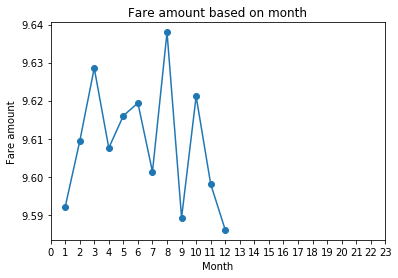

In [6]:
# Create hour feature
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)
df['fare_amount'] = pd.to_numeric(df.fare_amount)

df['month'] = df.pickup_datetime.dt.month

# Find median fare_amount for each month
hour_price = df.groupby('month', as_index=False)['fare_amount'].mean()

# Plot the line plot

#plt.plot(hour_price.month, hour_price.fare_amount, marker='o')
plt.plot(hour_price.month, hour_price.fare_amount, marker='o')
plt.xlabel('Month')
plt.ylabel('Fare amount')
plt.title('Fare amount based on month')
plt.xticks(range(24))
plt.show()


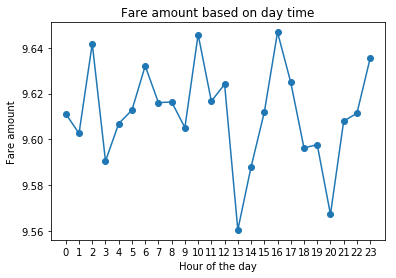

In [7]:
# Create hour feature
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['fare_amount'] = pd.to_numeric(df.fare_amount)

df['hour'] = df.pickup_datetime.dt.hour

# Find median fare_amount for each hour
hour_price = df.groupby('hour', as_index=False)['fare_amount'].mean()

# Plot the line plot
plt.plot(hour_price.hour, hour_price.fare_amount, marker='o')
plt.xlabel('Hour of the day')
plt.ylabel('Fare amount')
plt.title('Fare amount based on day time')
plt.xticks(range(24))
plt.show()

In [8]:
df.head(10)

,dropoff_datetime,pickup_datetime,dropoff_datetime_original,pickup_datetime_original,dropoff_date,pickup_date,dropoff_time,pickup_time,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,payment_type,rate_code,store_and_fwd_flag,surcharge,tip_amount,total_amount,trip_distance,vendor_id,payment_lookup,vendor_name,vendor_address,vendor_city,vendor_state,Unnamed: 27,vendor_zip,vendor_country,vendor_contact,vendor_current,month,hour
0,2009-01-04 00:14:53,2009-01-04 00:00:16,2009-01-04T00:14:53.983557+00:00,2009-01-04T00:00:16.442478+00:00,2009-01-04,2009-01-04,00:14:53.0000000,00:00:16.0000000,40.751178,-73.994145,40.761782,-73.985082,4.5,1,CASH,NaN,NaN,0.0,0.00,4.50,0.96,VTS,Cash,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes,NaN,1,0
1,2009-01-04 00:22:48,2009-01-04 00:11:35,2009-01-04T00:22:48.580928+00:00,2009-01-04T00:11:35.330769+00:00,2009-01-04,2009-01-04,00:22:48.0000000,00:11:35.0000000,40.798782,-73.979021,40.754507,-73.987906,13.8,1,Cash,NaN,NaN,0.0,0.00,13.80,4.90,CMT,Cash,"""Creative Mobile Technologies","LLC""",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com.Yes,NaN,1,0
2,2009-01-04 00:26:24,2009-01-04 00:14:29,2009-01-04T00:26:24.03359+00:00,2009-01-04T00:14:29.317353+00:00,2009-01-04,2009-01-04,00:26:24.0000000,00:14:29.0000000,40.736737,-74.008230,40.724120,-74.000112,6.5,1,CASH,NaN,NaN,0.0,0.00,6.50,1.28,VTS,Cash,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes,NaN,1,0
3,2009-01-04 00:33:32,2009-01-04 00:29:57,2009-01-04T00:33:32.570771+00:00,2009-01-04T00:29:57.647059+00:00,2009-01-04,2009-01-04,00:33:32.0000000,00:29:57.0000000,40.772233,-73.989840,40.779220,-73.950745,12.1,1,CASH,NaN,NaN,0.0,0.00,12.10,2.84,VTS,Cash,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes,NaN,1,0
4,2009-01-04 00:35:58,2009-01-04 00:31:50,2009-01-04T00:35:58.815661+00:00,2009-01-04T00:31:50.473645+00:00,2009-01-04,2009-01-04,00:35:58.0000000,00:31:50.0000000,40.750226,-73.991316,40.730044,-73.999026,6.1,1,Credit,NaN,NaN,0.0,0.91,7.01,1.60,CMT,Credit,"""Creative Mobile Technologies","LLC""",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com.Yes,NaN,1,0
5,2009-01-04 00:36:55,2009-01-04 00:27:21,2009-01-04T00:36:55.445071+00:00,2009-01-04T00:27:21.498238+00:00,2009-01-04,2009-01-04,00:36:55.0000000,00:27:21.0000000,40.750572,-73.978998,40.743170,-73.999968,6.9,1,CASH,NaN,NaN,0.0,0.00,6.90,1.80,VTS,Cash,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes,NaN,1,0
6,2009-01-04 00:39:36,2009-01-04 00:32:00,2009-01-04T00:39:36.955726+00:00,2009-01-04T00:32:00.897245+00:00,2009-01-04,2009-01-04,00:39:36.0000000,00:32:00.0000000,40.755855,-74.002205,40.752346,-73.993313,5.0,1,Cash,NaN,NaN,0.0,0.00,5.00,0.50,CMT,Cash,"""Creative Mobile Technologies","LLC""",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com.Yes,NaN,1,0
7,2009-01-04 00:41:37,2009-01-04 00:35:14,2009-01-04T00:41:37.693267+00:00,2009-01-04T00:35:14.349425+00:00,2009-01-04,2009-01-04,00:41:37.0000000,00:35:14.0000000,40.740907,-73.978744,40.726718,-73.983316,5.7,1,CASH,NaN,NaN,0.0,0.00,5.70,1.10,DDS,Cash,"""Dependable Driver Service","Inc""",8554 North Homestead St.,Bronx,NY,10472,USA,9778896500.Yes,NaN,1,0
8,2009-01-04 00:42:43,2009-01-04 00:31:50,2009-01-04T00:42:43.957151+00:00,2009-01-04T00:31:50.37789+00:00,2009-01-04,2009-01-04,00:42:43.0000000,00:31:50.0000000,40.745748,-74.005670,40.725766,-74.005620,7.5,1,Cash,NaN,NaN,0.0,0.00,7.50,2.00,CMT,Cash,"""Creative Mobile Technologies","LLC""",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com.Yes,NaN,1,0
9,2009-01-04 00:47:07,2009-01-04 00:39:40,2009-01-04T00:47:07.46357+00:00,2009-01-04T00:39:40.096525+00:00,2009-01-04,2009-01-04,00:47:07.0000000,00:39:40.0000000,40.748218,-73.980462,40.762632,-73.985500,7.3,2,CASH,NaN,NaN,0.5,0.00,7.80,1.46,VTS,Cash,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes,NaN,1,0


# 2. Which are the 3 biggest vendors based on the total amount of money raised;

In [9]:
df_vendors = pd.read_csv('empresas_valores_arrecadados.csv',encoding='iso-8859-1',delimiter =';')

# inspecionando

df_vendors.head(10)

,tarifa,gorjeta,total,vendor_id,nome
0,1.860678e+07,718470.60,1.954908e+07,CMT,"""Creative Mobile Technologies"
1,1.740721e+07,825853.96,1.904343e+07,VTS,VeriFone Inc
2,2.503647e+06,89835.52,2.714902e+06,DDS,"""Dependable Driver Service"
3,4.360000e+01,0.00,4.560000e+01,TS,Total Solutions Co


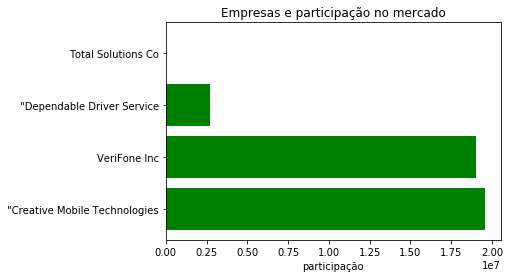

In [10]:


#df_vendors['total'] = pd.to_numeric(df_vendors.total)
df_vendors['total'].astype(float)
df_vendors['total'] = pd.to_numeric(df_vendors.total)

fornecedores = df_vendors['nome'] 
valores = df_vendors['total'] 


plt.barh(fornecedores, valores, color = 'green')
#plt.ylabel("empresas com maiores valores faturados")
plt.xlabel("participação")
plt.title("Empresas e participação no mercado")
plt.show()




Como podemos verificar no gráfico acima,  a empresa Creative Mobile Technologies possui maior valor em corridas, seguida de perto pela Verifone Inc e bem atrás pela Dependable Driver Service. A quarta empresa: Total Solutions Co nem aparece por apresentar um valor quase insignificante.

# 3. Make a histogram of the monthly distribution over 4 years of rides paid with cash;


In [62]:
df_monthly = pd.read_csv('valores_pagos_dinheiro_mensal.csv',encoding='iso-8859-1',delimiter =';')
#del df_monthly['milesimo_total']
del df_monthly['total']
#del df_monthly['ano']
#del df_monthly['mes']
del df_monthly['ano_mes']
# inspecionando
#df_monthly['total']=pd.to_numeric(df_monthly['total'])
#df_monthly['milesimo_total'] = df_monthly['milesimo_total'].astype(int)
df_monthly.pivot(index="mes", columns="milesimo_total") 
df_monthly.head(5)

,milesimo_total,ano,mes
0,627,2009,1
1,625,2009,2
2,696,2009,3
3,667,2009,4
4,698,2009,5


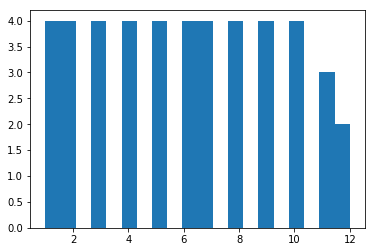

In [66]:
df_monthly['mes'].fillna(df_monthly['mes'].mean(), inplace=True)
histogram = plt.hist(df_monthly['mes'], bins=20)

plt.show()

### O histograma nos mostra que o mês 12 é um dos que apresenta menor número de viagens

# 4. Make a time series chart computing the number of tips each day for the last 3 months of 2012.

In [67]:
df_tips = pd.read_csv('gorjetas_dia_meses_8_9_10_2012_nao_tem_11_e_12.csv',encoding='iso-8859-1',delimiter =';')

# inspecionando

df_tips.head(10)

,2012,1,10,3276
0,2012,2,10,3327
1,2012,3,10,3382
2,2012,4,10,3372
3,2012,5,10,3304
4,2012,6,10,3287
5,2012,7,10,3289
6,2012,8,10,3219
7,2012,9,10,3364
8,2012,10,10,3399
9,2012,11,10,3245


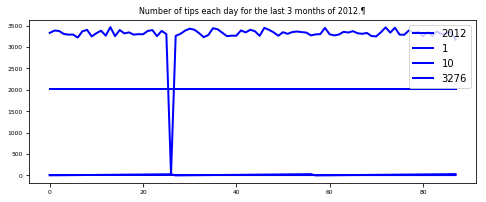

In [68]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = df_tips.plot(color='blue',figsize =(8, 3), linewidth=2, fontsize=6)

# Specify the title in your plot
ax.set_title('Number of tips each day for the last 3 months of 2012.¶', fontsize=8)

# Show plot
plt.show()

### Este gráfico apresenta os meses 8,9 e 10 de  2012, que são  os três últimos meses catalogados para este ano. Note que, no dia 28/10 ocorreram pouquíssimas corridas , só ocorreram 15 viagens neste dia. Foi o  dia que o furacão Sandy passou pela costa leste, logo, é um outlier que pode enviesar nossas análises.


#  Find what the fare amount (inclusive of tolls) for a taxi ride in New York City given the
pickup and dropoff locations

In [69]:
def haversine_distance(df):
    
    data = [df]
    lat1, long1, lat2, long2 = 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'
    
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        
    return d

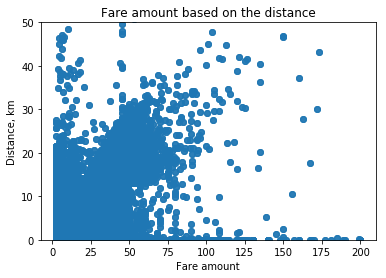

In [71]:
# Calculate the ride distance
df['distance_km'] = haversine_distance(df)

# Draw a scatterplot
plt.scatter(df['fare_amount'], df['distance_km'], alpha=0.5)
plt.xlabel('Fare amount')
plt.ylabel('Distance, km')
plt.title('Fare amount based on the distance')

# Limit on the distance
plt.ylim(0, 50)
plt.show()

### Este gráfico mostra a distância em Km em relação aos valores das viagens. A distância foi calculada com base  nas latitudes e longitudes de origem e de destino. É interessante notar que a função haversine_distance faz uma linha  entre origem e destino, levando em consideração a curvatura do planeta. 
### Nosso gráfico mostra que a maior parte das viagens são as de menor quilometragem e apresentam valores mais baixos. 
### Esta análise é muito importante para a escolha do tipo de veículo e também para escolher a abordagem a ser utilizada nas campanhas para vender os serviços da empresa.

In [76]:
# Convert pickup date to datetime object
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Create day of week feature
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

# Create hour feature
df['hour'] = df['pickup_datetime'].dt.hour

# Split back into train and test
#new_train = df[df.id.isin(df.id)]
#new_test = df[df.id.isin(df.id)]

In [73]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


def get_cv_score(train):
    features = ['pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude',
            'passenger_count', 'distance_km', 'hour', 'weird_feature']
    
    features = [x for x in features if x in df.columns]
  
    # Create KFold object
    kf = KFold(n_splits=3, shuffle=True, random_state=123)

    rmse_scores = []
    
    # Loop through each split
    for train_index, test_index in kf.split(df):
        cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
    
        # Train a Gradient Boosting model
        gb = GradientBoostingRegressor(random_state=123).fit(cv_train[features], cv_train.fare_amount)
    
        # Make predictions on the test data
        pred = gb.predict(cv_test[features])
    
        fold_score = np.sqrt(mean_squared_error(cv_test['fare_amount'], pred))
        rmse_scores.append(fold_score)
    
    return np.round(np.mean(rmse_scores) + np.std(rmse_scores), 5)

C:\Users\94275793668\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [74]:
# Delete passenger_count column
new_train_1 = df.drop('passenger_count', axis=1)

# Compare validation scores
initial_score = get_cv_score(df)
new_score = get_cv_score(new_train_1)

print('Initial score is {} and the new score is {}'.format(initial_score, new_score))

Initial score is 3.59662 and the new score is 3.59662


What is the average trip time on Saturdays and Sundays;

In [77]:
df_sab_dom = pd.read_csv('sabados_domingos.csv',delimiter =';')

# inspecionando

df_sab_dom.head(3)

C:\Users\94275793668\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (17,18,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dropoff_datetime,pickup_datetime,dropoff_datetime_original,pickup_datetime_original,dropoff_date,pickup_date,dropoff_time,pickup_time,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,payment_type,rate_code,store_and_fwd_flag,surcharge,tip_amount,total_amount,trip_distance,vendor_id,payment_lookup,name,address,city,state,zip,country,contact,current,dia_semana
0,2012-10-27 04:27:40.000,2012-10-27 04:18:46.000,2012-10-27T04:27:40.109685+00:00,2012-10-27T04:18:46.600474+00:00,2012-10-27,2012-10-27,04:27:40.0000000,04:18:46.0000000,40.752357,-73.977947,40.737357,-73.990240,"6,5",5,CASH,NaN,NaN,0,0,"6,5","1,49",VTS,Cash,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes,Sábado
1,2012-10-27 04:51:59.000,2012-10-27 04:43:54.000,2012-10-27T04:51:59.811183+00:00,2012-10-27T04:43:54.944737+00:00,2012-10-27,2012-10-27,04:51:59.0000000,04:43:54.0000000,0.000000,0.000000,0.000000,0.000000,"3,7",1,CASH,NaN,NaN,1,0,"4,7","0,05",VTS,Cash,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes,Sábado
2,2012-10-27 04:55:03.000,2012-10-27 04:45:41.000,2012-10-27T04:55:03.227911+00:00,2012-10-27T04:45:41.015375+00:00,2012-10-27,2012-10-27,04:55:03.0000000,04:45:41.0000000,40.771845,-73.982310,40.759483,-73.987615,"5,7",1,CASH,NaN,NaN,"0,5",0,"6,2","1,31",VTS,Cash,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes,Sábado


In [78]:

#df_sab_dom.round({"dropoff_latitude":2, "dropoff_longitude":2}) 
# Compute the mean: mean_length_vers
df_sab_dom['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df_sab_dom['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)
df_sab_dom['tempo']=df_sab_dom['dropoff_datetime']-df_sab_dom['pickup_datetime']
sabado = df_sab_dom[df_sab_dom['dia_semana'] == 'Sábado'].copy()
tempo_viagem_med_sab = np.mean(sabado['tempo'])
lat_pick_sab = np.mean(sabado['pickup_latitude'])
long_pick_sab = np.mean(sabado['pickup_longitude'])
lat_drop_sab = np.mean(sabado['dropoff_latitude'])
long_drop_sab = np.mean(sabado['dropoff_longitude'])

tempo_viagem_med_sab
domingo = df_sab_dom[df_sab_dom['dia_semana'] == 'Domingo'].copy()
tempo_viagem_med_dom = np.mean(domingo['tempo'])
tempo_viagem_med_dom
lat_pick_dom = np.mean(domingo['pickup_latitude'])
long_pick_dom = np.mean(domingo['pickup_longitude'])
lat_drop_dom = np.mean(domingo['dropoff_latitude'])
long_drop_dom = np.mean(domingo['dropoff_longitude'])
print('tempo médio de viagem aos sábados:',tempo_viagem_med_sab)
print('tempo médio de viagem aos domingos:',tempo_viagem_med_dom)

print('latitude origem aos sábados:',lat_pick_sab)
print('latitude origem aos domingos:',lat_pick_dom)
print('longitude origem aos sábados:',long_pick_sab)
print('longitude origem aos domingos:',long_pick_dom)
print('latitude destino aos sábados:',lat_drop_sab)
print('latitude destino aos domingos:',lat_drop_dom)
print('longitude destino aos sábados:',long_drop_sab)
print('longitude destino aos domingos:',long_drop_dom)






tempo médio de viagem aos sábados: 0 days 00:08:39.113592
tempo médio de viagem aos domingos: 0 days 00:08:39.440908
latitude origem aos sábados: 40.11586321139349
latitude origem aos domingos: 40.12420644968864
longitude origem aos sábados: -72.81398137989045
longitude origem aos domingos: -72.82940198095375
latitude destino aos sábados: 40.12637410345556
latitude destino aos domingos: 40.13573912588446
longitude destino aos sábados: -72.83212554070366
longitude destino aos domingos: -72.84926856931664


### É interessante notar que sábados e domingos apresentam o mesmo tempo médio de viagem, aproximadamente 8 minutos e 39 segundos.
### Fiz também uma análise das latitudes e longitudes médias aos sábados e domingos, resultando em valores bem semelhantes. Esta média indica os centróides da região onde as corridas acontecem. Esta informação pode ser utilizada para se criar uma estratégia logística, posicionando os veículos próximos a pontos com maior volume de embarques.


Analyse the data to find and prove seasonality

In [79]:
# usa funçoes para criar colunas dia, dia da semana, do ano e mes, criou um dataframe so para estes campos
df['MES'] = df['pickup_datetime'].dt.month
df['DIA'] = df['pickup_datetime'].dt.day
df['DIA_DA_SEMANA'] = df['pickup_datetime'].dt.weekday
df['NM_DIA_DA_SEMANA'] = df['pickup_datetime'].dt.day_name
df['DIA_DO_ANO'] = df['pickup_datetime'].dt.dayofyear
df['DIA_DA_SEMANA'] = df['pickup_datetime'].dt.weekday



In [84]:
# que dias tem mais corridas
#df['DIA_DA_SEMANA'].value_counts()
#df['MES'].value_counts()
df['DIA_DO_ANO'].value_counts()
#df.head(3)
# distancia media das corridas
# tempo m[edio corridas
# dia da semana e do ano mais frequentes]

51     10510
199    10487
124    10458
284    10456
187    10453
248    10451
298    10446
72     10433
195    10421
59     10407
46     10405
253    10405
13     10404
292    10399
261    10393
229    10391
176    10391
21     10387
226    10387
117    10384
297    10383
167    10377
216    10375
289    10373
77     10371
134    10369
108    10369
196    10368
99     10367
241    10367
       ...  
324     7427
323     7422
320     7413
310     7410
322     7402
316     7395
9       7388
312     7387
307     7349
314     7330
308     7275
319     7264
333     4998
341     4985
334     4923
343     4878
335     4872
338     4870
339     4845
340     4840
330     4836
331     4823
336     4811
337     4807
332     4772
342     4747
2       2770
3       2704
345     2422
344     2410
Name: DIA_DO_ANO, Length: 344, dtype: int64

### Notamos que o dia da semana que tem mais corridas é a segunda-feira, seguida pelo domingo. Sábado é o dia com menor número de corridas.


### Como já havia sido identificado no histograma, o melhor mês é julho, dezembro é o pior



# Make a latitude and longitude map view of pickups and dropoffs in the year 2010;

In [82]:
import geopandas as gpd
import pysal as ps
from pysal.contrib.viz import mapping as maps

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
# set the filepath and load in a shapefile
fp = “datasets/geo-data/gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp”
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

In [ ]:
map_df.plot()

In [ ]:
df = pd.read_csv(“datasets/london-borough-profile.csv”, header=0)
df.head()

In [ ]:
df = df[[‘borough’,’Happiness_score_2011–14_(out_of_10)’, ‘Anxiety_score_2011–14_(out_of_10)’, ‘Population_density_(per_hectare)_2017’, ‘Mortality_rate_from_causes_considered_preventable_2012/14’]]